#### 형태소 판별 (문장)

In [ ]:
from konlpy.tag import Twitter

In [3]:
twitter = Twitter()
print('문장입력')
text = input()
classifiedData = twitter.pos(text,norm=True,stem=True) 
print(classifiedData)

문장입력
소장 또는 2번 이상 읽을만한 책은 아닌 것 같습니다
[('소장', 'Noun'), ('또는', 'Adverb'), ('2', 'Number'), ('번', 'Noun'), ('이상', 'Noun'), ('읽다', 'Verb'), ('책', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('것', 'Noun'), ('같다', 'Adjective')]


### 출현 빈도 분석

In [4]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
from matplotlib import font_manager, rc
import matplotlib
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [11]:
# 파일 열고 글자 출력
fp = codecs.open("review_all_200113/7. 나는 무조건 합격하는 공부만 한다.txt", 'r', encoding='utf-8')
soup = BeautifulSoup(fp, "html.parser")
# body = soup.select_one('body > text')
text = soup.getText()
# 텍스트 한줄씩 처리
twitter = Twitter()
word_dic = {}
lines = text.split('\n')
for line in lines:
    malist = twitter.pos(line)
    for word in malist:
        if word[1] == 'Noun': # 명사
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1
# 많이 사용된 명사 출력
key = []
y = []
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
for word, count in keys[1:20]:
    key.append(word)
    y.append(count)
df = key, y
key

['공부',
 '내용',
 '법',
 '것',
 '유튜브',
 '시험',
 '합격',
 '생각',
 '도움',
 '유투브',
 '수',
 '구매',
 '부분',
 '변호사',
 '거',
 '꼭',
 '기대',
 '저',
 '분']

#### #데이터프레임으로 변경

In [196]:
df25 = df(data={'Key':key, 'Count':y})
df25

,Key,Count
0,선물,18
1,아들,16
2,때,10
3,내용,9
4,것,8
5,도움,8
6,꼭,7
7,마음,6
8,삶,6
9,인생,6


In [63]:
#!pip install XlsxWriter

In [30]:
# !pip install openpyxl

In [51]:
# !pip install Openpyxl

In [197]:
import openpyxl

In [198]:
# 엑셀로 저장
writer = pd.ExcelWriter('review_key_count.xlsx', engine='xlsxwriter')
 
## DataFrame을 xlsx에 쓰기
with pd.ExcelWriter(writer) as writer:
    df1.to_excel(writer, sheet_name='Sheet1')
    df2.to_excel(writer, sheet_name='Sheet2')
    df3.to_excel(writer, sheet_name='Sheet3')
    df4.to_excel(writer, sheet_name='Sheet4')
    df5.to_excel(writer, sheet_name='Sheet5')
    df6.to_excel(writer, sheet_name='Sheet6')
    df7.to_excel(writer, sheet_name='Sheet7')
    df8.to_excel(writer, sheet_name='Sheet8')
    df9.to_excel(writer, sheet_name='Sheet9')
    df10.to_excel(writer, sheet_name='Sheet10')
    df11.to_excel(writer, sheet_name='Sheet11')
    df12.to_excel(writer, sheet_name='Sheet12')
    df13.to_excel(writer, sheet_name='Sheet13')
    df14.to_excel(writer, sheet_name='Sheet14')
    df15.to_excel(writer, sheet_name='Sheet15')
    df16.to_excel(writer, sheet_name='Sheet16')
    df17.to_excel(writer, sheet_name='Sheet17')
    df18.to_excel(writer, sheet_name='Sheet18')
    df19.to_excel(writer, sheet_name='Sheet19')
    df20.to_excel(writer, sheet_name='Sheet20')
    df21.to_excel(writer, sheet_name='Sheet21')
    df22.to_excel(writer, sheet_name='Sheet22')
    df23.to_excel(writer, sheet_name='Sheet23')
    df24.to_excel(writer, sheet_name='Sheet24')
    df25.to_excel(writer, sheet_name='Sheet25')
 # Pandas writer 객체 닫기
writer.close()

### 빈도 그래프

In [45]:
# !pip install pytagcloud

  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-cp37-none-any.whl size=759873 sha256=7ae191dfbe2b89fe79cbd6f5ea7f701dcc9c8b7d661877334b3bf9d90fcc09e2
  Stored in directory: C:\Users\tj-bu-702\AppData\Local\pip\Cache\wheels\08\bf\d4\8899fd82d7f62af5960d17cc59b80edae474380b92828c8c1f
Successfully built pytagcloud


In [5]:
from matplotlib import font_manager, rc
import matplotlib
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

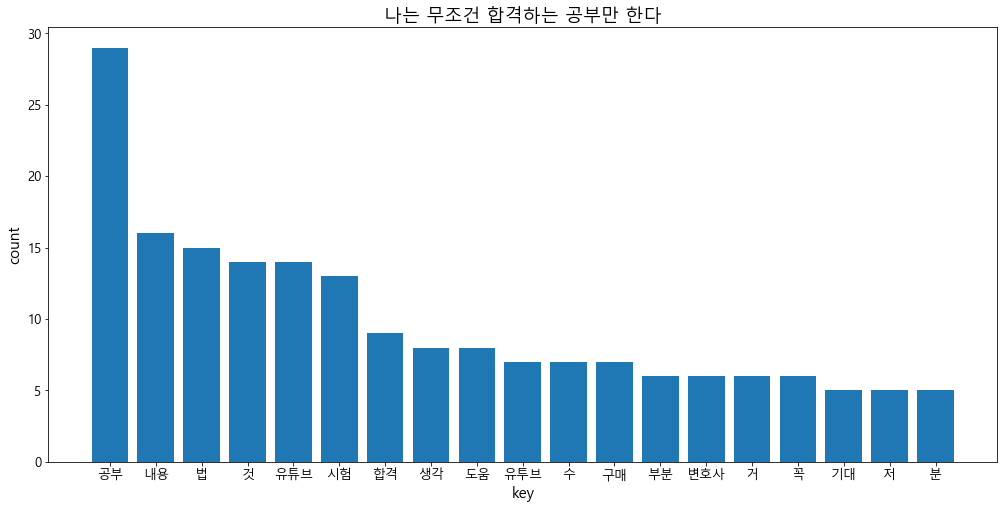

In [21]:
fig = plt.figure(figsize=(17, 8))
# ax = fig.add_subplot(111)

plt.bar(key,y)
plt.rc('font', size=13)
plt.xlabel('key',  fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('나는 무조건 합격하는 공부만 한다',  fontsize=18)
plt.show()

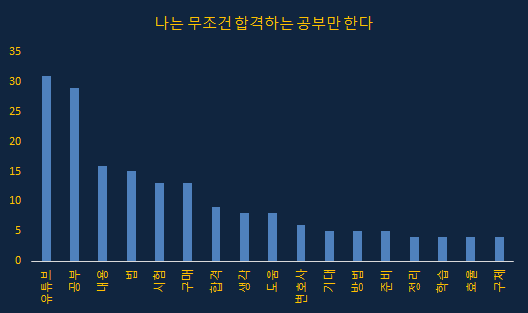

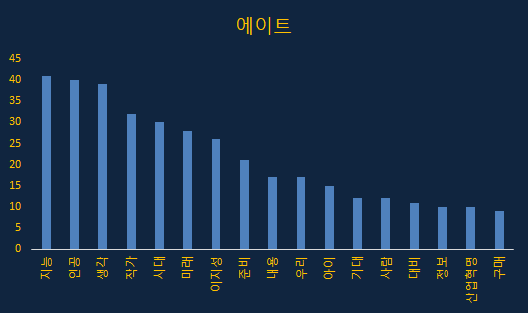

### wordcloud

In [2]:
from wordcloud import WordCloud, STOPWORDS
from konlpy.tag import Mecab

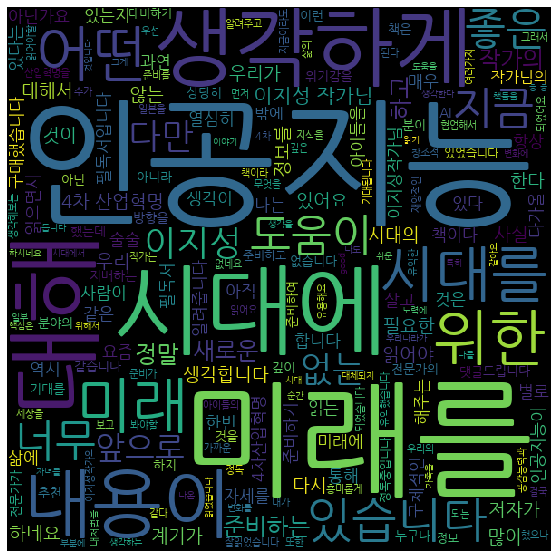

In [9]:
stopwords = set(STOPWORDS)
stopwords.add("읽고")
stopwords.add("쉽게")
stopwords.add("위해")
stopwords.add("인공지능에")
stopwords.add("감사합니다")
stopwords.add("대한")
stopwords.add("하는")
stopwords.add("많은")
stopwords.add("있는")
stopwords.add("어떻게")
stopwords.add("책입니다")
stopwords.add("인공지능의")
stopwords.add("좋아요")
stopwords.add("책을")
stopwords.add("입니다")

font_path='c:/windows/Fonts/NanumGothic.ttf'
wordcloud=WordCloud(
    font_path=font_path,
    stopwords=stopwords,
    background_color='black',
    width=600,
    height=600)
wordcloud_text=open('D:/redwnl/teamproject/review_all_200113/2. 에이트.txt', encoding='UTF8').read()
wordcloud = wordcloud.generate(wordcloud_text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')

### 감정 분류기

In [199]:
from konlpy.tag import Twitter
import nltk

twitter = Twitter()

print(twitter.morphs(u'한글형태소분석기 테스트 중 입니다')) # ??
print(twitter.nouns(u'한글형태소분석기 테스트 중 입니다!')) #명사
print(twitter.pos(u'한글형태소분석기 테스트 중 입니다.')) #형태소

['한글', '형태소', '분', '석기', '테스트', '중', '입니다']
['한글', '형태소', '석기', '테스트', '중']
[('한글', 'Noun'), ('형태소', 'Noun'), ('분', 'Suffix'), ('석기', 'Noun'), ('테스트', 'Noun'), ('중', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]


D:\Users\tj-bu-702\Anaconda3\envs\ptest\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [200]:
def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
    return data

def tokenize(doc):
  # norm, stem은 optional
  return ['/'.join(t) for t in twitter.pos(doc, norm=True, stem=True)]

def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}

In [219]:
# 트래이닝 데이터와 테스트 데이터를 읽기
train_data = read_data('classify_comment_emotion-master/data/ratings_train.txt')
test_data = read_data('classify_comment_emotion-master/data/ratings_test.txt')

In [218]:
test_data

[['', '댓글', '평점'],
 ['0',
  '교활한 상술과 이에 편승한 교보에 실망했다.이책은 책이 아니고 그냥 노트일 뿐이다.그것도 쓰기 불편한 노트를 책인것 처럼 포장해서 비싸게 판다는 것도 이해불가이고, 더구나 교보에서 추천한것도 불가사의하다. 책임있는 누군가의 답변이 듣고싶다.',
  '0'],
 ['1', '좋은 분께 선물드린 책입니다,,', '1'],
 ['2', '매년 같은날 다른 기분과 느낌 매일매일이 새로운 기분일것같아요꼭 사시길 추천행요', '1'],
 ['3', '배송 받자마자 오늘 처음 시작했어요. 5년간 내 삶의 기록들이 기대됩니다.', '1'],
 ['4', '얼마전에 서점에서 발견하고 계속 사고 싶었던 책이라 너무너무 기대되요!!', '1'],
 ['5',
  '책이라기 보다는 다이어리를 구매하기 전 여러 사람들의 구매평을 찾아보았다.몇몇은 아주 좋다며 추천을 했고, 몇몇은 저자가 너무 날로먹는다는 말도 있었다.누구나 만들 수 있는 그냥 노트라고 생각할 수 있지만, 생각뿐 실천하지 못하는 가장 큰 부분을 저자가 이루어준 것이 아닌가 싶다. 본인이 어느쪽에 가치를 두느냐에 따라 이 책은 그 어떤 책보다 뜻깊은 나만의 책이 될 수도 있고, 시중 문제집처럼 반드시 풀어나가고 채워나가야만 하는 과제로 생각한다면 그저 하루하루 의무적인 과업이 될 수도 있을 것이다. 이런저런 생각이 굉장히 많은, 그래서 하루하루가 그런 생각들로 가득찬 나에게는 오히려 명확하게 생각할 주제를 매일매일 주어진다는 것이 좋게 다가왔다. 가벼운 질문부터 깊게 생각하는 질문이 있는데, 그냥 스치는 듯한 가벼운 질문도 깊게 생각해서 지금 내가 생각할 수 있고 표현할 수 있는 모든 것을 적어내려 한다. 1년, 2년 그리고 5년 뒤의 나는 지금의 나에 비해 얼마나 성장했고, 바래져있는지 과거의 내 삶을 매일매일 들여다 볼 수 있는 좋은 책, 아니 다이어리인 것 같다. ',
  '1'],
 ['6',
  '친구가 생일 선물로 이거 해달라고 해서 선물해 줬어요~~이쁘게 

In [220]:
# row, column의 수가 제대로 읽혔는지 확인
print(len(train_data))      # nrows: 150000
print(len(train_data[0]))   # ncols: 3
print(len(test_data))       # nrows: 50000
print(len(test_data[0]))     # ncols: 3

150001
3
50001
3


In [221]:
# 형태소 분류
train_docs = [(tokenize(row[1]), row[2]) for row in train_data[1:]]
test_docs = [(tokenize(row[1]), row[2]) for row in test_data[1:]]

In [222]:
#Training data의 token 모으기
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2159924


In [223]:
# Load tokens with nltk.Text()
text = nltk.Text(tokens, name='NMSC')
print(text.vocab().most_common(10))

[('./Punctuation', 67777), ('영화/Noun', 50818), ('하다/Verb', 41209), ('이/Josa', 38540), ('보다/Verb', 38538), ('의/Josa', 30188), ('../Punctuation', 29055), ('가/Josa', 26627), ('에/Josa', 26468), ('을/Josa', 23118)]


In [224]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\tj-
[nltk_data]     bu-702\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [225]:
from nltk import collocations

In [226]:
# 텍스트간의 연어 빈번하게 등장하는 단어 구하기
text.collocations()

ValueError: too many values to unpack (expected 2)

In [227]:
# term이 존재하는지에 따라서 문서를 분류
selected_words = [f[0] for f in text.vocab().most_common(2000)] # 여기서는 최빈도 단어 2000개를 피쳐로 사용
train_docs = train_docs[:10000] # 시간 단축을 위한 꼼수로 training corpus의 일부만 사용할 수 있음
train_xy = [(term_exists(d), c) for d, c in train_docs]
test_xy = [(term_exists(d), c) for d, c in test_docs]

In [228]:
# nltk의 NaiveBayesClassifier으로 데이터를 트래이닝 시키고, test 데이터로 확인
classifier = nltk.NaiveBayesClassifier.train(train_xy) #Naive Bayes classifier 적용
print(nltk.classify.accuracy(classifier, test_xy))
# => 0.80418

classifier.show_most_informative_features(10)

0.80414
Most Informative Features
         exists(수작/Noun) = True                1 : 0      =     38.0 : 1.0
     exists(이딴/Modifier) = True                0 : 1      =     32.1 : 1.0
         exists(최악/Noun) = True                0 : 1      =     30.1 : 1.0
       exists(♥/Foreign) = True                1 : 0      =     24.5 : 1.0
         exists(노잼/Noun) = True                0 : 1      =     22.1 : 1.0
         exists(짜증/Noun) = True                0 : 1      =     19.5 : 1.0
        exists(쓰레기/Noun) = True                0 : 1      =     19.4 : 1.0
         exists(여운/Noun) = True                1 : 0      =     18.9 : 1.0
          exists(굿/Noun) = True                1 : 0      =     17.1 : 1.0
        exists(발연기/Noun) = True                0 : 1      =     16.9 : 1.0
